# *Vsevolod Tiemnohorov*

## *xtiemn00*

### **4.1 Základy**

/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Apple/usr/bin:/Library/Frameworks/Mono.framework/Versions/Current/Commands:/Users/pinlog/opt/anaconda3/bin:/condabin:/Library/Frameworks/Python.framework/Versions/3.8/bin:/Users/pinlog/Library/Python/3.8/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Apple/usr/bin:/Library/Frameworks/Mono.framework/Versions/Current/Commands:/Users/pinlog/opt/anaconda3/bin:/condabin:/Library/Frameworks/Python.framework/Versions/3.8/bin:/Users/pinlog/Library/Python/3.8/bin


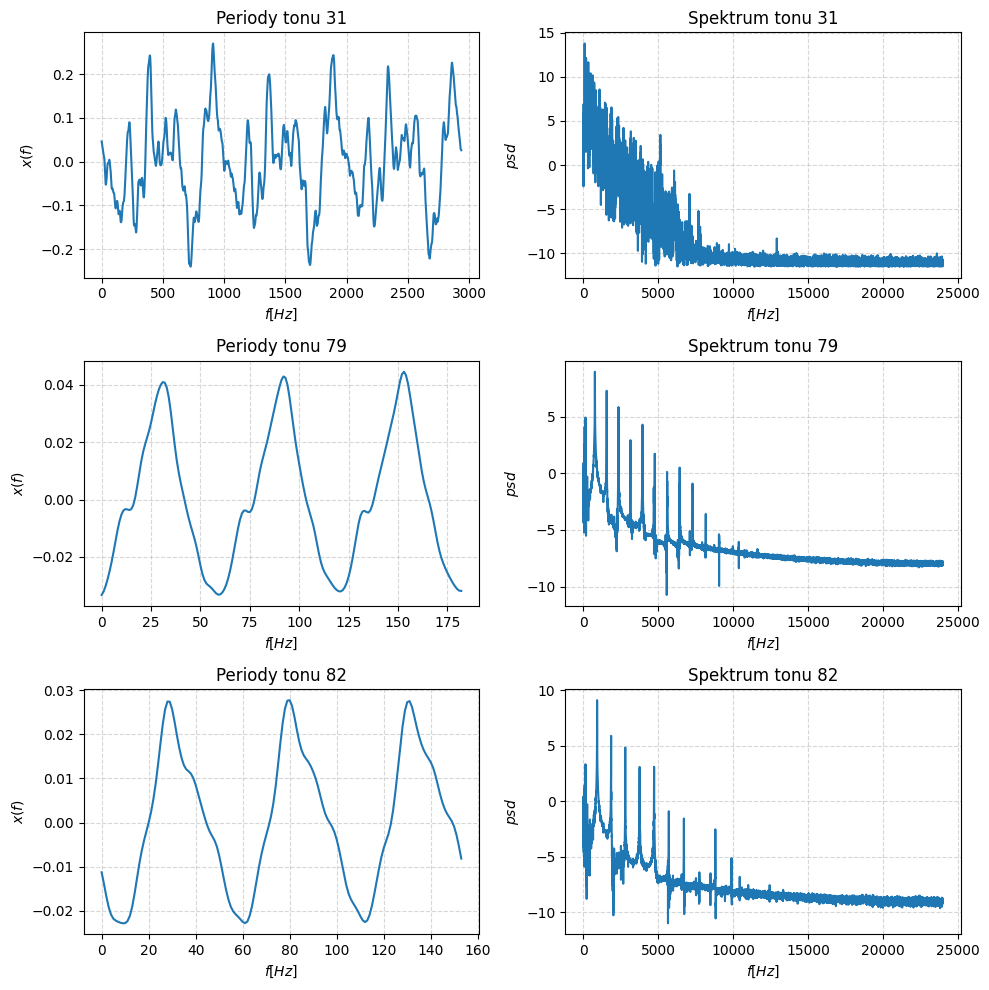

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

MIDIFROM = 24
MIDITO = 108
SKIP_SEC = 0.25
HOWMUCH_SEC = 0.5
WHOLETONE_SEC = 2

# constants for my tones
TONE_ONE = 31
TONE_TWO = 79
TONE_THREE = 82

howmanytones = MIDITO - MIDIFROM + 1

tones = np.arange(MIDIFROM, MIDITO+1)
orig, Fs = sf.read("../klavir.wav")

N = int(Fs * HOWMUCH_SEC)
Nwholetone = int(Fs * WHOLETONE_SEC)
n = np.arange(0, N)
xall = np.zeros((MIDITO+1, N))
samplefrom = int(SKIP_SEC * Fs)
sampleto = samplefrom + N
t = n / Fs
for tone in tones:
    x = orig[samplefrom:sampleto]
    x = x - np.mean(x)
    xall[tone] = x
    samplefrom += Nwholetone
    sampleto += Nwholetone

# code from above was taken from task

sf.write("../audio/a_orig.wav", xall[TONE_ONE], Fs)
sf.write("../audio/b_orig.wav", xall[TONE_TWO], Fs)
sf.write("../audio/c_orig.wav", xall[TONE_THREE], Fs)

# create three .wav files with my tones

_, ax = plt.subplots(3,2, figsize=(10, 10))

samplefrom = int(((TONE_ONE - MIDIFROM) * Fs * WHOLETONE_SEC) + (SKIP_SEC * Fs))
sampleto = int(samplefrom + N)

tone_d = orig[samplefrom:sampleto]

# code to show log PSD

dft_1 = np.fft.fft(tone_d)
dft_half_1 = np.abs(dft_1[:N // 2])
dft_half_log_1 = np.log(dft_half_1 ** 2 + 1e-5)
dft_x_1 = np.arange(dft_half_1.size) * (Fs / tone_d.size)

# build plot of sprektrum

ax[0, 1].set_title('Spektrum tonu 31')
ax[0, 1].plot(dft_x_1, dft_half_log_1)
ax[0, 1].set_xlabel('$f[Hz]$')
ax[0, 1].set_ylabel('$psd$')
ax[0, 1].grid(alpha=0.5, linestyle='--')

sampleto = int(samplefrom + Fs/49.00 * 3) # change end of sample to show 3 periods of tone

# build plot of 3 periods

ax[0, 0].plot(orig[samplefrom : sampleto])
ax[0, 0].set_xlabel('$f[Hz]$')
ax[0, 0].set_ylabel('$x(f)$')
ax[0, 0].set_title('Periody tonu 31')
ax[0, 0].grid(alpha=0.5, linestyle='--')

# repeat this three times

samplefrom = int(((TONE_TWO - MIDIFROM) * Fs * WHOLETONE_SEC) + (SKIP_SEC * Fs))
sampleto = int(samplefrom + N)

tone_d = orig[samplefrom:sampleto]

dft_2 = np.fft.fft(tone_d)
dft_half_2 = np.abs(dft_2[:N // 2])
dft_half_log_2 = np.log(dft_half_2 ** 2 + 1e-5)
dft_x_2 = np.arange(dft_half_2.size) * (Fs / tone_d.size)

ax[1, 1].set_title('Spektrum tonu 79')
ax[1, 1].plot(dft_x_2, dft_half_log_2)
ax[1, 1].set_xlabel('$f[Hz]$')
ax[1, 1].set_ylabel('$psd$')
ax[1, 1].grid(alpha=0.5, linestyle='--')

sampleto = int(samplefrom + Fs/783.99 * 3)

ax[1, 0].plot(orig[samplefrom : sampleto])
ax[1, 0].set_xlabel('$f[Hz]$')
ax[1, 0].set_ylabel('$x(f)$')
ax[1, 0].set_title('Periody tonu 79')
ax[1, 0].grid(alpha=0.5, linestyle='--')

samplefrom = int(((TONE_THREE - MIDIFROM) * Fs * WHOLETONE_SEC) + (SKIP_SEC * Fs))
sampleto = int(samplefrom + N)

tone_d = orig[samplefrom:sampleto]

dft_3 = np.fft.fft(tone_d)
dft_half_3 = np.abs(dft_3[:N // 2])
dft_half_log_3 = np.log(dft_half_3 ** 2 + 1e-5)
dft_x_3 = np.arange(dft_half_3.size) * (Fs / tone_d.size)

ax[2, 1].set_title('Spektrum tonu 82')
ax[2, 1].plot(dft_x_3, dft_half_log_3)
ax[2, 1].set_xlabel('$f[Hz]$')
ax[2, 1].set_ylabel('$psd$')
ax[2, 1].grid(alpha=0.5, linestyle='--')

sampleto = int(samplefrom + Fs/932.33 * 3)

ax[2, 0].plot(orig[samplefrom : sampleto])
ax[2, 0].set_xlabel('$f[Hz]$')
ax[2, 0].set_ylabel('$x(f)$')
ax[2, 0].set_title('Periody tonu 82')
ax[2, 0].grid(alpha=0.5, linestyle='--')

plt.tight_layout()

plt.show()

### **4.2 Určení základní frekvence**

Tone  24  základní frekvence :  32.83173734610123
Tone  25  základní frekvence :  34.78260869565217
Tone  26  základní frekvence :  36.866359447004605
Tone  27  základní frekvence :  39.05614320585842
Tone  28  základní frekvence :  41.37931034482759
Tone  29  základní frekvence :  43.83561643835616
Tone  30  základní frekvence :  46.46660212971926
Tone  31  základní frekvence :  49.23076923076923
Tone  32  základní frekvence :  52.17391304347826
Tone  33  základní frekvence :  55.23590333716916
Tone  34  základní frekvence :  58.53658536585366
Tone  35  základní frekvence :  62.01550387596899
Tone  36  základní frekvence :  65.66347469220246
Tone  37  základní frekvence :  69.56521739130434
Tone  38  základní frekvence :  73.73271889400921
Tone  39  základní frekvence :  78.04878048780488
Tone  40  základní frekvence :  82.75862068965517
Tone  41  základní frekvence :  88.0
Tone  42  základní frekvence :  92.0
Tone  43  základní frekvence :  98.

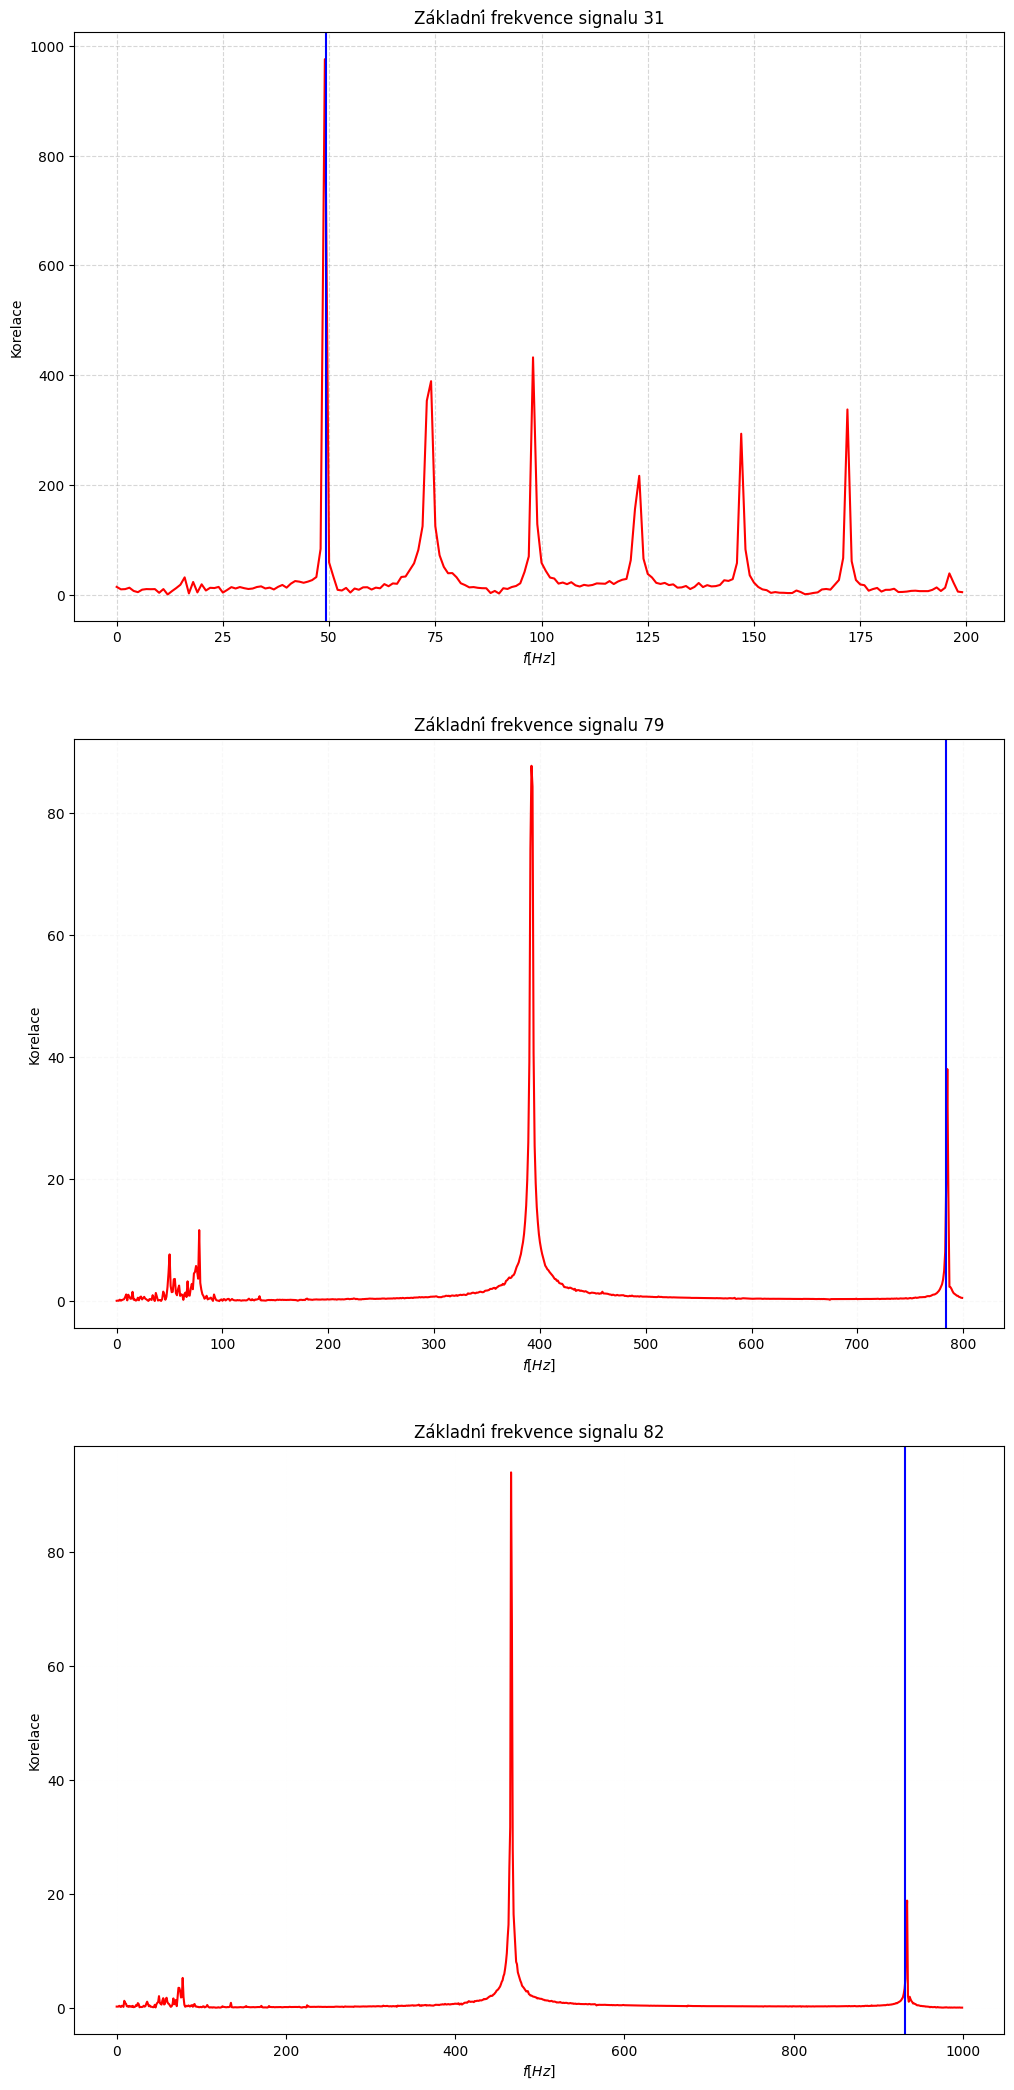

In [2]:
import scipy.signal as ss

c_all = np.zeros(109) # array to store peak of every tone

# autocorrelate from 24 to 40 because correlation works well only for low values

for c in range(MIDIFROM, 41):
    signal = xall[c]
    correlation = np.correlate(signal, signal, mode='full')[Fs // 2:]
    peak = np.argmax(correlation[200:])
    c_all[c] = Fs / (peak + 200)
    print("Tone ", c, " základní frekvence : ", c_all[c])

# find peaks from 41 to 108 with the help of DFT, because DFT works well (and faster than autocorrelation) only from 41's value

for c in range(41, MIDITO+1):
    dft = np.fft.fft(xall[c])
    
    G = np.log(np.abs(dft)**2 + 10 ** -5)
    peak,_ = ss.find_peaks(G, height=3, distance=2002)

    c_all[c] = peak[0] * 2
    print("Tone ", c, " základní frekvence : ", c_all[c])

_, bx = plt.subplots(3,1, figsize=(12, 26))

# code to show plots of DFT with marked peaks
    
bx[0].plot(dft_half_1[:200], color='r')
bx[0].axvline(c_all[TONE_ONE], -12, 12, color='b')
bx[0].set_xlabel('$f[Hz]$')
bx[0].set_ylabel('Korelace')
bx[0].set_title('Základní frekvence signalu 31')
bx[0].grid(alpha=0.5, linestyle='--')

bx[1].plot(dft_half_2[:800], color='r')
bx[1].axvline(c_all[TONE_TWO], -12, 12, color='b')
bx[1].set_xlabel('$f[Hz]$')
bx[1].set_ylabel('Korelace')
bx[1].set_title('Základní frekvence signalu 79')
bx[1].grid(alpha=0.08, linestyle='--')

bx[2].plot(dft_half_3[:1000], color='r')
bx[2].axvline(c_all[TONE_THREE], -12, 12, color='b')
bx[2].set_xlabel('$f[Hz]$')
bx[2].set_ylabel('Korelace')
bx[2].set_title('Základní frekvence signalu 82')
bx[2].grid(alpha=0.01, linestyle='--')

plt.show()